# BERT 

In [1]:
import torch
from torch.utils.data import DataLoader
from transformers import BertTokenizer

import sys
from pathlib import Path
import pandas as pd

In [2]:
sys.path.append("/work/NLP/src")
from data.dataloaders.bert_loader import BERTDataLoader
from models.bert import BertClassifier
from train.bert_trainer import BERTTrainer
from evaluate import ModelEvaluator


2025-02-15 14:53:34.048151: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-15 14:53:34.060578: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739627614.073823    7646 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739627614.077782    7646 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-15 14:53:34.093441: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

### Data Loader

In [3]:
csv_file_path = "/work/NLP/data/processed/unprocessed_dataset.csv"
data_loader = BERTDataLoader(
    csv_path=csv_file_path,
    batch_size=16,
    bert_model_name="bert-base-uncased",
    max_length=512  
)


In [4]:
lyrics_train, lyrics_val, lyrics_test, decades_train, decades_val, decades_test = data_loader.split_data()


Data Split Summary:
Train set: 70.00% (Expected: 70.00%)
Val set: 9.90% (Expected: 10.00%)
Test set: 20.10% (Expected: 20.00%)


In [5]:
# Tokenize using BERT and create dataloaders
train_loader, val_loader, test_loader = data_loader.tokenize_and_create_loaders(
    lyrics_train, 
    lyrics_val, 
    lyrics_test, 
    decades_train, 
    decades_val, 
    decades_test
)



Tokenizing train set...
Max sequence length in train set: 512

Tokenizing val set...
Max sequence length in val set: 512

Tokenizing test set...
Max sequence length in test set: 512


### BERT 

In [6]:
classifier = BertClassifier(num_labels=8)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [8]:
trainer = BERTTrainer(
model=classifier,
train_loader=train_loader,
val_loader=val_loader,
test_loader=test_loader,
device=device,
num_epochs=30, # Adjust as needed
early_stopping_patience=3, # Adjust as needed
target_names=['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
)




Epoch 1/30
------------------------------


Evaluating val: 100%|██████████| 247/247 [00:09<00:00, 24.74it/s]


Train Loss: 1.9574 - Train Acc: 0.2157
Val Loss: 2.0055 - Val Acc: 0.2049

Epoch 2/30
------------------------------


Evaluating val: 100%|██████████| 247/247 [00:09<00:00, 24.76it/s]


Train Loss: 1.8045 - Train Acc: 0.2739
Val Loss: 2.0109 - Val Acc: 0.2214

Epoch 3/30
------------------------------


Evaluating val: 100%|██████████| 247/247 [00:09<00:00, 24.76it/s]


Train Loss: 1.7546 - Train Acc: 0.2961
Val Loss: 1.8750 - Val Acc: 0.2692

Epoch 4/30
------------------------------


Evaluating val: 100%|██████████| 247/247 [00:09<00:00, 24.77it/s]


Train Loss: 1.7193 - Train Acc: 0.3076
Val Loss: 1.7673 - Val Acc: 0.3083

Epoch 5/30
------------------------------


Evaluating val: 100%|██████████| 247/247 [00:09<00:00, 24.78it/s]


Train Loss: 1.7027 - Train Acc: 0.3173
Val Loss: 1.7415 - Val Acc: 0.3207

Epoch 6/30
------------------------------


Evaluating val: 100%|██████████| 247/247 [00:09<00:00, 24.78it/s]


Train Loss: 1.6820 - Train Acc: 0.3260
Val Loss: 1.6958 - Val Acc: 0.3299

Epoch 7/30
------------------------------


Evaluating val: 100%|██████████| 247/247 [00:09<00:00, 24.79it/s]


Train Loss: 1.6650 - Train Acc: 0.3347
Val Loss: 1.7370 - Val Acc: 0.3151

Epoch 8/30
------------------------------


Evaluating val: 100%|██████████| 247/247 [00:09<00:00, 24.79it/s]


Train Loss: 1.6500 - Train Acc: 0.3399
Val Loss: 1.6901 - Val Acc: 0.3266

Epoch 9/30
------------------------------


Evaluating val: 100%|██████████| 247/247 [00:09<00:00, 24.79it/s]


Train Loss: 1.6387 - Train Acc: 0.3453
Val Loss: 1.6964 - Val Acc: 0.3410

Epoch 10/30
------------------------------


Evaluating val: 100%|██████████| 247/247 [00:09<00:00, 24.79it/s]


Train Loss: 1.6261 - Train Acc: 0.3522
Val Loss: 1.7200 - Val Acc: 0.3108

Epoch 11/30
------------------------------


Evaluating val: 100%|██████████| 247/247 [00:09<00:00, 24.79it/s]


Train Loss: 1.6169 - Train Acc: 0.3538
Val Loss: 1.6796 - Val Acc: 0.3299

Epoch 12/30
------------------------------


Evaluating val: 100%|██████████| 247/247 [00:09<00:00, 24.78it/s]


Train Loss: 1.6022 - Train Acc: 0.3591
Val Loss: 1.6705 - Val Acc: 0.3362

Epoch 13/30
------------------------------


Evaluating val: 100%|██████████| 247/247 [00:09<00:00, 24.79it/s]


Train Loss: 1.5970 - Train Acc: 0.3622
Val Loss: 1.6567 - Val Acc: 0.3395

Epoch 14/30
------------------------------


Evaluating val: 100%|██████████| 247/247 [00:09<00:00, 24.79it/s]


Train Loss: 1.5883 - Train Acc: 0.3639
Val Loss: 1.6620 - Val Acc: 0.3349

Epoch 15/30
------------------------------


Evaluating val: 100%|██████████| 247/247 [00:09<00:00, 24.78it/s]


Train Loss: 1.5873 - Train Acc: 0.3710
Val Loss: 1.6784 - Val Acc: 0.3261

Epoch 16/30
------------------------------


Evaluating val: 100%|██████████| 247/247 [00:09<00:00, 24.80it/s]


Train Loss: 1.5709 - Train Acc: 0.3744
Val Loss: 1.6353 - Val Acc: 0.3634

Epoch 17/30
------------------------------


Evaluating val: 100%|██████████| 247/247 [00:09<00:00, 24.77it/s]


Train Loss: 1.5648 - Train Acc: 0.3772
Val Loss: 1.6660 - Val Acc: 0.3349

Epoch 18/30
------------------------------


Evaluating val: 100%|██████████| 247/247 [00:09<00:00, 24.78it/s]


Train Loss: 1.5623 - Train Acc: 0.3775
Val Loss: 1.6283 - Val Acc: 0.3344

Epoch 19/30
------------------------------


Evaluating val: 100%|██████████| 247/247 [00:09<00:00, 24.80it/s]


Train Loss: 1.5522 - Train Acc: 0.3836
Val Loss: 1.6160 - Val Acc: 0.3426

Epoch 20/30
------------------------------


Evaluating val: 100%|██████████| 247/247 [00:09<00:00, 24.79it/s]


Train Loss: 1.5481 - Train Acc: 0.3825
Val Loss: 1.6363 - Val Acc: 0.3390

Epoch 21/30
------------------------------


Evaluating val: 100%|██████████| 247/247 [00:09<00:00, 24.78it/s]


Train Loss: 1.5392 - Train Acc: 0.3937
Val Loss: 1.6224 - Val Acc: 0.3464

Epoch 22/30
------------------------------


Evaluating val: 100%|██████████| 247/247 [00:09<00:00, 24.78it/s]


Train Loss: 1.5369 - Train Acc: 0.3888
Val Loss: 1.6339 - Val Acc: 0.3309

Early stopping triggered!


Evaluating test: 100%|██████████| 500/500 [00:20<00:00, 24.71it/s]



Final Test Results:
Test Loss: 1.6165 - Test Acc: 0.3377
Training stats saved to /work/NLP/reports/trainingstats_bert.csv
Training and Validation plots saved to /work/NLP/reports/figures/trainingplots_bert.png


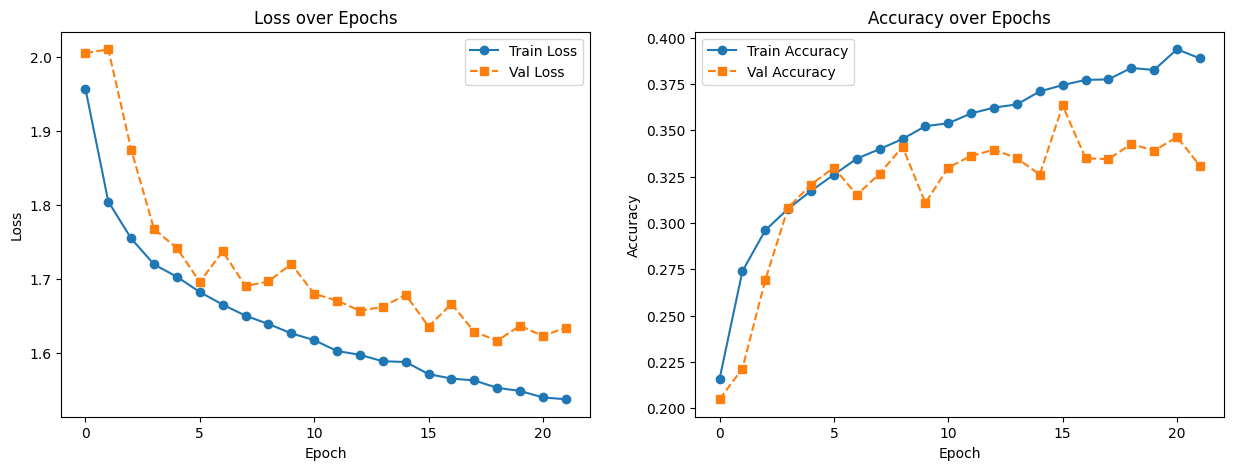

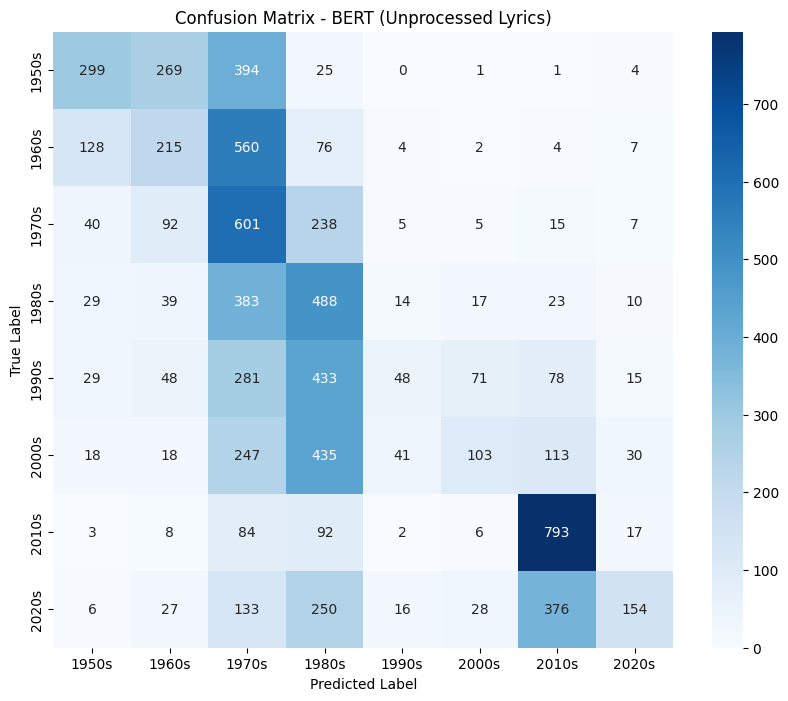

In [9]:
training_history = trainer.train()